<a href="https://colab.research.google.com/github/papipopapu/NeuralNetwork/blob/main/Muelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import typing as tp
import math 
import numba as nb
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html = 'jshtml')


In [ ]:
@nb.njit()
def RK4 (f, Y0, t0, tau, N):

  t = t0
  Dim = Y0.size
  Y = np.zeros((N, Dim))
  T = np.zeros(N)
  T[0] = t0
  Y[0] = Y0

  k1 = np.zeros(Dim)
  k2 = np.zeros(Dim)
  k3 = np.zeros(Dim)
  k4 = np.zeros(Dim)
  for i in np.arange(1, N):
    k1 = tau * f(t, Y[i-1])
    k2 = tau * f(t + 0.5 * tau, Y[i-1] +  0.5 * k1)
    k3 = tau * f(t + 0.5 * tau, Y[i-1] +  0.5 * k2)
    k4 = tau * f(t + tau, Y[i-1] + k3)
    Y[i] = Y[i-1] + 1./6 * (k1 + 2 * (k2 + k3) + k4)
    t += tau
    T[i] = t
  return Y, T


In [128]:
InvM1 = 1/1
InvM2 = 1/2
InvM3 = 1/3
ka = 1
kb = 1
Beta = 0.1
@nb.njit()
def f(t, y):
  aux = np.zeros(y.size)
  aux[0:3] = y[3:6]
  aux[3] = InvM1 * ka * (y[1] - y[0]) - Beta * y[3]
  aux[4] = InvM2 * (- ka*(y[1] - y[0]) + kb*(y[2] - y[1])) - Beta * y[4]
  aux[5] =  - InvM3 * kb * (y[2] - y[1]) - Beta * y[5]
  return aux




In [129]:
Y0 = np.asarray([1,2,5,-1,-1, 1.6])
Y, T = RK4(f, Y0, 0, 0.1, 1000)

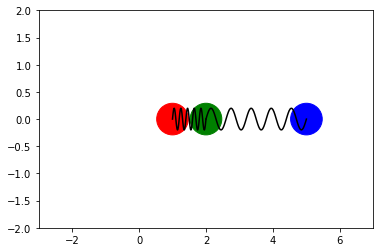

In [130]:
fig = plt.figure()
axis = plt.axes(xlim = (-2,6), ylim = (-1,1))
line = axis.scatter([],[])
N = 100
sine = np.sin(np.linspace(0, 10 * math.pi, N)) * 0.2

def animate(i):
  X = Y[i, :3]
  axis.clear()
  axis.set_xlim([-3,7])
  axis.set_ylim([-2,2])
  line = axis.scatter(X, [0,0,0], c = ['r', 'g', 'b'], s = [1000, 1000, 1000])


  m1x = np.linspace(X[0], X[1], N)
  m1l = abs(X[1] - X[0])
  m2x = np.linspace(X[1], X[2], N)
  m2l = abs(X[2] - X[1])

  


  m1 = axis.plot(m1x, sine, c = 'k')
  m2 = axis.plot(m2x, sine, c = 'k')
  return line, m1, m2 

animation = FuncAnimation(fig, animate, interval = 50, frames = 100)
plt.show()


In [131]:
animation